# Introduction to Regression with Neural Networks in TensorFlow

> There are many definitions for a regression problem but in our case, we're going to simplify it: prediciting a numerical variables based on some other combination of variables, even shorter.. prediciting a number.

# New Section

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to View and fit

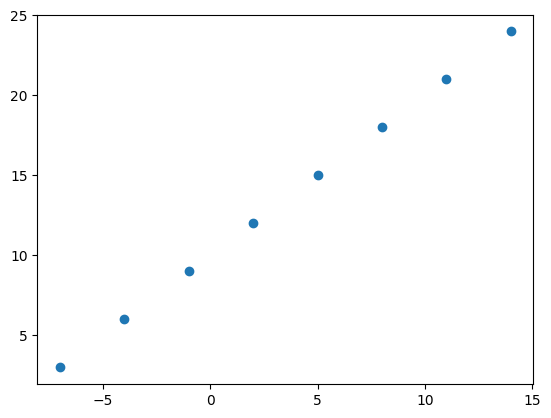

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0 ,14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x,y);

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
x[0], y[0]

(-7.0, 3.0)

In [ ]:
x[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = x.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors

X = tf.constant(x)
Y = tf.constant(y)
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

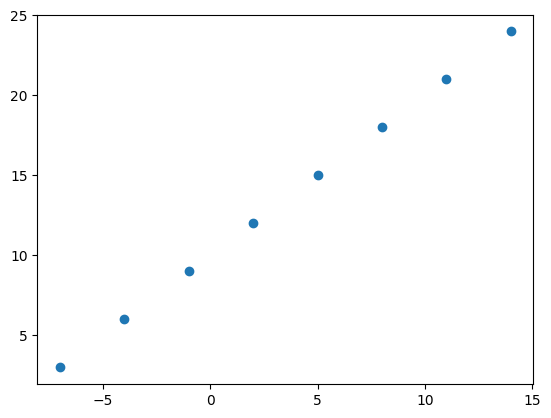

In [ ]:
plt.scatter(X, Y);


## Steps in modelling with TensorFlow

 1. **Creating a model** - define the input and putpuut layers, as well as the hidden layers of a deep learning model.
 2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of out model).
 3. **Fittig a model** - letting the model try to find the patterns between X & Y (features & labels)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 5)



Epoch 1/5
1/1 [==============================] - 0s 316ms/step - loss: 14.7704 - mae: 14.7704
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 14.6379 - mae: 14.6379
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 14.5054 - mae: 14.5054
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 14.3729 - mae: 14.3729
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 14.2404 - mae: 14.2404


In [ ]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[-3.14531]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units ( all called neaurons) within each of the hiddenlayers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a Model** - here we might fit a model for more **epochs** (leave it training for longer) or no more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model ( this time well train for longer)
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 307ms/step - loss: 14.5526 - mae: 14.5526
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.4201 - mae: 14.4201
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 14.2876 - mae: 14.2876
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1551 - mae: 14.1551
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 14.0226 - mae: 14.0226
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.8901 - mae: 13.8901
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 13.7576 - mae: 13.7576
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6251 - mae: 13.6251
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4926 - mae: 13.4926
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3601 - mae: 13.3601
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 69ms/step


array([[29.69475]], dtype=float32)

In [ ]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if wew can make another to improve our model

# 1. Create a model ( this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 396ms/step - loss: 13.9562 - mae: 13.9562
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4076 - mae: 13.4076
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8825 - mae: 12.8825
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3781 - mae: 12.3781
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8673 - mae: 11.8673
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3461 - mae: 11.3461
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8201 - mae: 10.8201
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2786 - mae: 10.2786
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7166 - mae: 9.7166
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1291 - mae: 9.1291
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 105ms/step


array([[32.284275]], dtype=float32)

In [ ]:
# Let's see if wew can make another to improve our model

# 1. Create a model ( this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None ),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 563ms/step - loss: 13.2753 - mae: 13.2753
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.7225 - mae: 12.7225
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1671 - mae: 12.1671
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6062 - mae: 11.6062
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0369 - mae: 11.0369
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4562 - mae: 10.4562
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.8612 - mae: 9.8612
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2487 - mae: 9.2487
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6157 - mae: 8.6157
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9589 - mae: 7.9589
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 445ms/step


array([[30.129894]], dtype=float32)

In [ ]:
# Let's see if wew can make another to improve our model

# 1. Create a model ( this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu" ),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 13.6745 - mae: 13.6745
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.8338 - mae: 12.8338
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.9894 - mae: 11.9894
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1489 - mae: 11.1489
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.3078 - mae: 10.3078
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6148 - mae: 9.6148
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.9792 - mae: 8.9792
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3274 - mae: 8.3274
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.6607 - mae: 7.6607
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9716 - mae: 6.9716
Epoch 11/100
1/1 [==============================] - 0s 12m

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 122ms/step


array([[27.320168]], dtype=float32)

### Commom ways to improve a deep model

* Adding Layers
* Increse the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate ( Most important hyperparamter in many neural netework)
* Fitting on more data
* fitting for longer

## Evaluating the model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good ide to visualize:
* The data - what data are we working with> what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictons of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
Y = X + 10
Y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

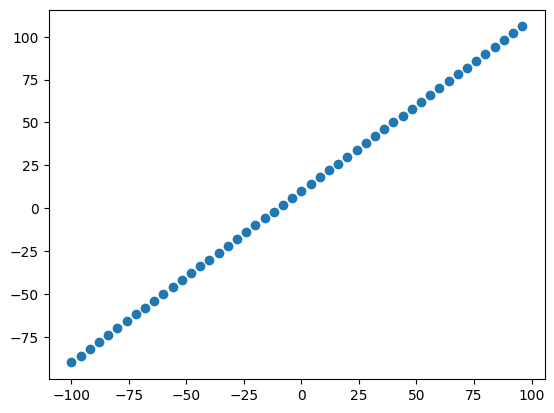

In [ ]:
# Visualize the data

plt.scatter(X, Y);

### The 3 datasets
(Most Important concept in Machine Learning)

* **Training Set** - the model learns from the this data, which is typically 70- 80% of the total data you have available.
* **Validation Set**  - the model gets tuned on this data, which is typically 10 -15% of the data available.
* **Test Set** - the model gets evaluated in this data to test what is has learned, this set is typically 10 -15% of the total data available.

**Note**: This is called **Generalization** - The ability for a machine learning well on data it hasn't seen before.

In [ ]:
# Check the length of the how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples (80% of the data)
Y_train = Y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
Y_test = Y[40:]

X_train, Y_train, X_test, Y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

### Visualizing the data

Now we've got our data in training and test sets.. let's visualize it again!

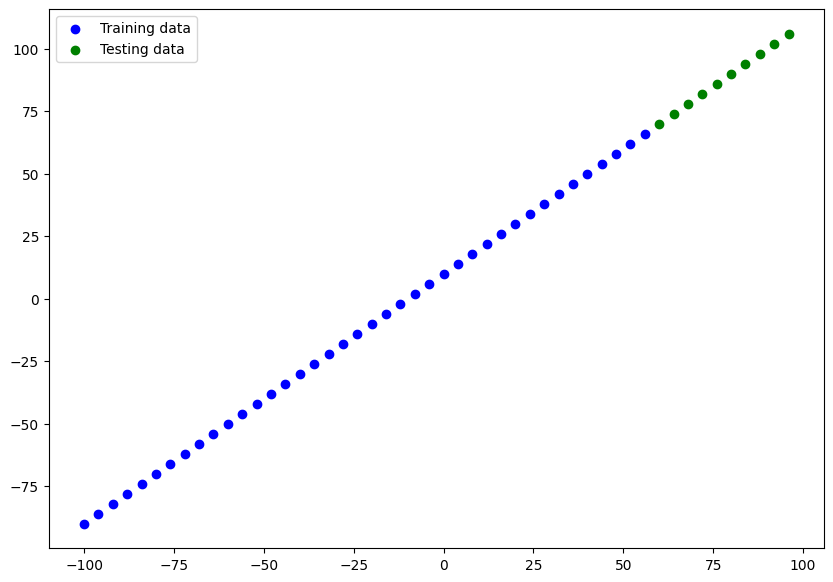

In [ ]:
plt.figure(figsize = (10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c = 'b', label = "Training data")
# Plot test data in red
plt.scatter(X_test, Y_test, c = 'g', label = "Testing data")
# show a legend
plt.legend();

In [ ]:
# Let's have look up how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
#mode.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 10)

### Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1, input_shape =[1])
)

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typically when you bring in already learn patterns or paramters from other models during **transfer learning**)

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters ( total and trainable) by calling `model.summary()`

In [ ]:
# let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100, verbose = 0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


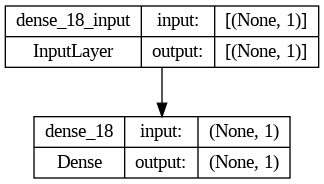

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_preds` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[44.390045],
       [47.263924],
       [50.137802],
       [53.01168 ],
       [55.88556 ],
       [58.759438],
       [61.633312],
       [64.50719 ],
       [67.38107 ],
       [70.254944]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape =[1], name = "input_layer_1"),
    tf.keras.layers.Dense(10, input_shape =[1], name = "input_layer_2"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3.Fit the Model
model.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 70, verbose = 0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 20)                40        
                                                                 
 input_layer_2 (Dense)       (None, 10)                210       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


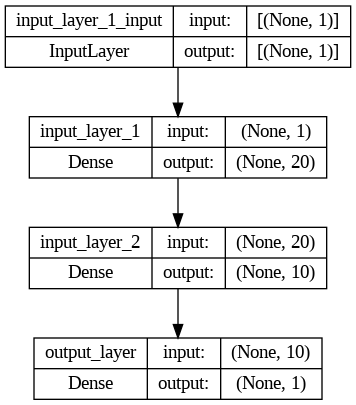

In [ ]:
plot_model(model = model, show_shapes = True)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[55.597595],
       [59.19653 ],
       [62.795452],
       [66.394394],
       [69.993324],
       [73.592255],
       [77.19119 ],
       [80.79012 ],
       [84.38905 ],
       [87.98798 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note**: if you feel like you're going to reuse some kiind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:

# Let's create a plotting function
def plot_predictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize = (10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();

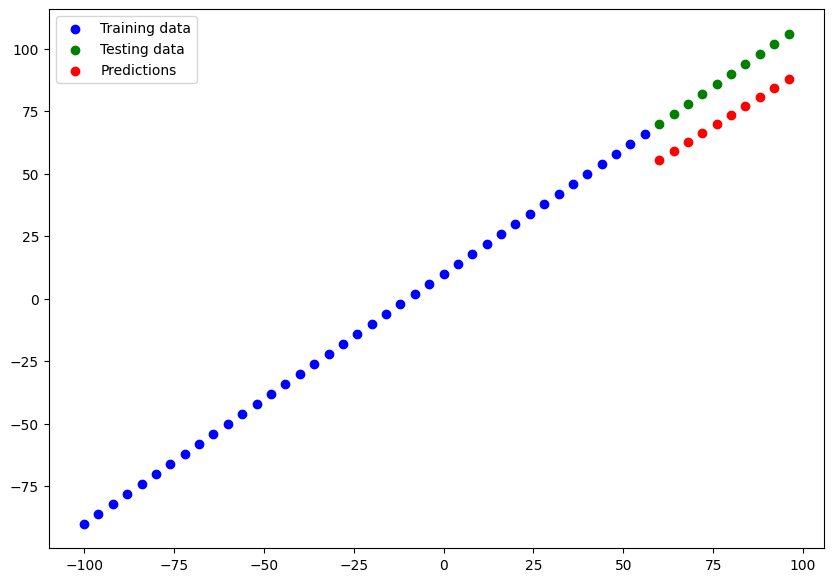

In [ ]:
plot_predictions()

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:
* MAE - Mean Absolute Error, "on avergae, how wring is each of my model's predictions"
* MSE - Mean Square Error - "square the average erros"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 175ms/step - loss: 16.2072 - mae: 16.2072


[16.207210540771484, 16.207210540771484]

In [ ]:
y_pred

array([[55.597595],
       [59.19653 ],
       [62.795452],
       [66.394394],
       [69.993324],
       [73.592255],
       [77.19119 ],
       [80.79012 ],
       [84.38905 ],
       [87.98798 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# calcualte the Mean absolute error
mae = tf.keras.losses.MAE(y_true = Y_test, y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32.402405, 28.80347 , 25.204548, 21.605606, 18.006676, 15.126196,
       12.885284, 11.283951, 10.322189, 10.      ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[55.597595],
       [59.19653 ],
       [62.795452],
       [66.394394],
       [69.993324],
       [73.592255],
       [77.19119 ],
       [80.79012 ],
       [84.38905 ],
       [87.98798 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([55.597595, 59.19653 , 62.795452, 66.394394, 69.993324, 73.592255,
       77.19119 , 80.79012 , 84.38905 , 87.98798 ], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = Y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=16.20721>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = Y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=264.0007>

In [ ]:
# Make some functrions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate  ...
```

1. Get more data - get more exampples for your model to train on (more opportunities to learn pattern or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_custom` - (own create)

In [ ]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build ``model_1``**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name = 'model_1')

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"],)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 45.9374 - mae: 45.9374
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 15.0833 - mae: 15.0833
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.2777 - mae: 14.2777
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6769 - mae: 7.6769
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1389 - mae: 9.1389
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6128 - mae: 8.6128
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0390 - mae: 9.0390
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0936 - mae: 9.0936
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.9054 - mae: 19.9054
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7634 - mae: 10.7634
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - lo

1/1 [==============================] - 0s 44ms/step


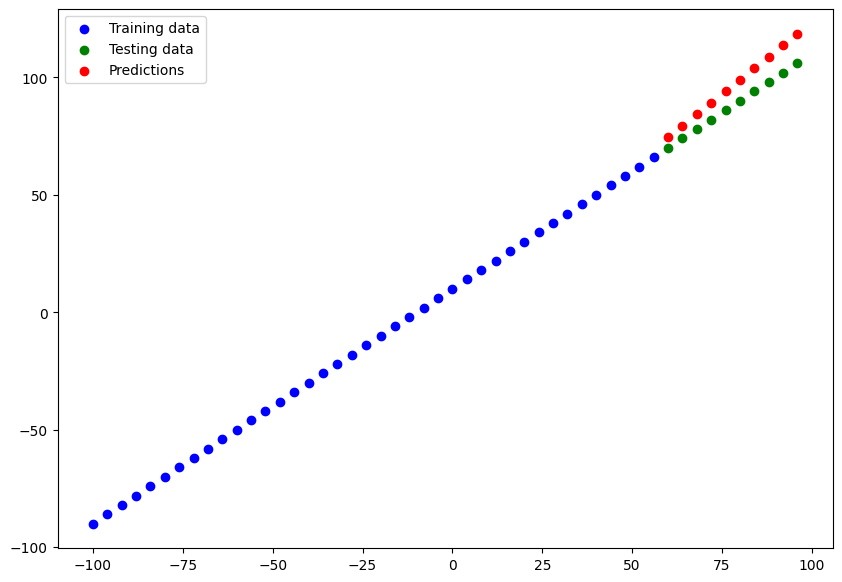

In [ ]:
# Make and plot predictions for model_1

Y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = Y_pred_1)


In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, Y_pred_1)
mse_1 = mse(Y_test, Y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.54363>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.445755>)

**Build ```model_2```**

* 2 Dense layers,trained for 100 epochs ( Choose your own hidden units)

In [ ]:
# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1)
    ], name = 'model_2')

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'],)

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100, verbose = 0)

1/1 [==============================] - 0s 55ms/step


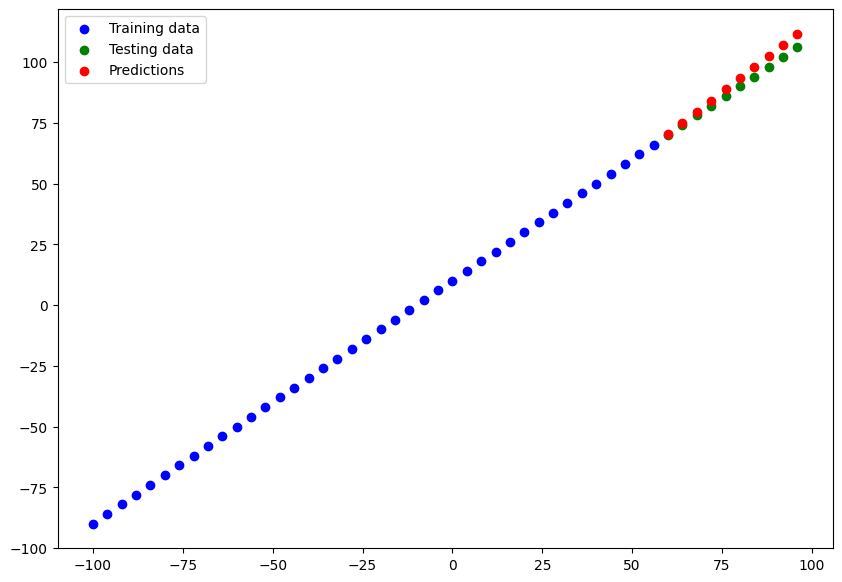

In [ ]:
# Make and plot predictions for model_2

Y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = Y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, Y_pred_2)
mse_2 = mse(Y_test, Y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0052993>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.799565>)

**Build ```model_3```**

* 2 Layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(1)
], name = 'model_3')

# 2. Compile the model
model_3.compile(loss = tf.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 30.4319 - mae: 30.4319
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 26.2663 - mae: 26.2663
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 30.6442 - mae: 30.6442
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 13.1354 - mae: 13.1354
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 17.2183 - mae: 17.2183
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.1046 - mae: 10.1046
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0967 - mae: 11.0967
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0999 - mae: 11.0999
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4093 - mae: 40.4093
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8120 - mae: 27.8120
Epoch 11/500
2/2 [==============================] - 0s 9ms

1/1 [==============================] - 0s 91ms/step


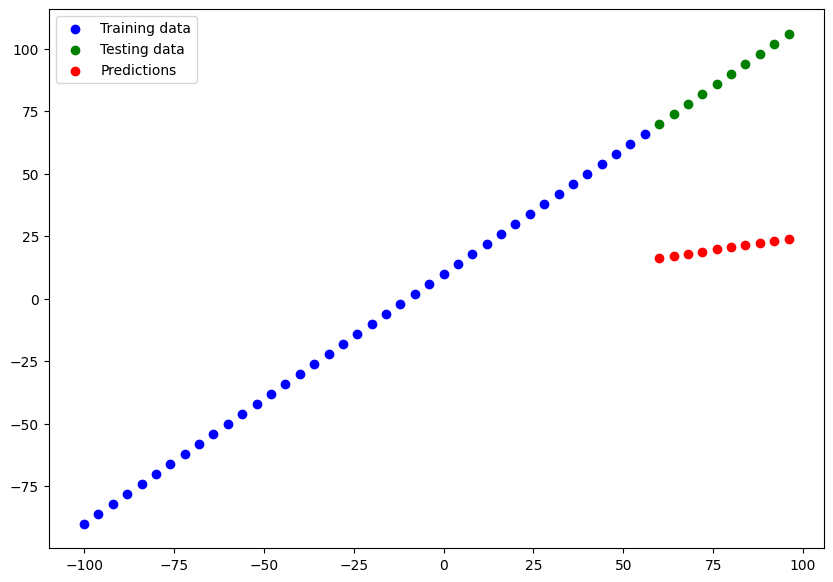

In [ ]:
# Make and plot predictions for model_3

Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = Y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, Y_pred_3)
mse_3 = mse(Y_test, Y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.885605>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4692.753>)

🔑**Note:** You want to start with experiments (small models) and make they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# let's compare our model's results using a pandas Dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,8.543630,79.445755
1,model_2,3.005299,11.799565
2,model_3,67.885605,4692.752930


Looks like ```model_2``` performed the best...

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                60        
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto:
```"Experiment, Experiment, experiment".```

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in web application or mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_saved_format")

In [ ]:
# Save model using HDF5 format
model_2.save("Best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saving a model

In [ ]:
# load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_saved_format")

In [ ]:
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                60        
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format

1/1 [==============================] - 0s 85ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 70.39886 ],
        [ 74.978065],
        [ 79.557274],
        [ 84.13648 ],
        [ 88.7157  ],
        [ 93.29491 ],
        [ 97.874115],
        [102.453316],
        [107.03254 ],
        [111.61174 ]], dtype=float32),
 array([[ 70.39886 ],
        [ 74.978065],
        [ 79.557274],
        [ 84.13648 ],
        [ 88.7157  ],
        [ 93.29491 ],
        [ 97.874115],
        [102.453316],
        [107.03254 ],
        [111.61174 ]], dtype=float32))

In [ ]:
# Compare the MAE of model_2 preds and loaded_savedModel
mae(y_true = Y_test, y_pred = model_2_preds) == mae(y_true = Y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_2_preds.squeeze()

array([ 70.39886 ,  74.978065,  79.557274,  84.13648 ,  88.7157  ,
        93.29491 ,  97.874115, 102.453316, 107.03254 , 111.61174 ],
      dtype=float32)

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([ 70.39886 ,  74.978065,  79.557274,  84.13648 ,  88.7157  ,
        93.29491 ,  97.874115, 102.453316, 107.03254 , 111.61174 ],
      dtype=float32)

In [ ]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
tf.squeeze(model_2_preds) == tf.squeeze(loaded_SavedModel_format_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
# Load  in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                60        
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predicts match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

NameError: ignored

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. Go to "Files" tab and right click on th file and click "download"
2. Use code(see the below cell below).
3. Save it to google Drive by connecting Google Drive and copying ot there (see 2nd code cell below)

In [ ]:
# Download a file from Google colab
from google.colab import files
files.download("/content/Best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive
!cp /content/Best_model_HDF5_format.h5 /content/drive/MyDrive/ML_Model_2

In [ ]:
!ls /content/drive/MyDrive/ML_Model_2

Best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & Y values ( features and labels)
x = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View x
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name = "Insurance_Model_1")

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["MAE"])

# 3. Fit the model
insurance_model.fit( tf.expand_dims(x_train, axis = -1), y_train, epochs = 100 )

Epoch 1/100
34/34 [==============================] - 5s 4ms/step - loss: 13215.3320 - MAE: 13215.3320
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12288.7900 - MAE: 12288.7900
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12172.1084 - MAE: 12172.1084
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12096.9492 - MAE: 12096.9492
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11982.1230 - MAE: 11982.1230
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 11794.0049 - MAE: 11794.0049
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 11467.1455 - MAE: 11467.1455
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 10955.1816 - MAE: 10955.1816
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 10340.1289 - MAE: 10340.1289
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 9695.168

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 8918.3877 - MAE: 8918.3877


[8918.3876953125, 8918.3876953125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well.. let's try and improve it!

### Evaluating Model with own experiments

* ```insurance_model_o2``` - 3 layers with 30 hidden units trained for 400 epochs
* ```insurance_model_o3``` - 4 layers with 20, 40 ,60 hidden units trained for 500 epochs, with Adam optimizer

In [ ]:
# 1. create the insurance_model_o2
insurance_model_o2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1),
], name = "insurance_model_o2")

# 2. Compile the model_o2
insurance_model_o2.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.SGD(),
                           metrics = ["mae"],)

# 3. Fit the model
insurance_model_o2.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 400)


Epoch 1/400
34/34 [==============================] - 1s 4ms/step - loss: 12540.4980 - mae: 12540.4980
Epoch 2/400
34/34 [==============================] - 0s 4ms/step - loss: 11721.2285 - mae: 11721.2285
Epoch 3/400
34/34 [==============================] - 0s 4ms/step - loss: 10955.2695 - mae: 10955.2695
Epoch 4/400
34/34 [==============================] - 0s 4ms/step - loss: 10701.3369 - mae: 10701.3369
Epoch 5/400
34/34 [==============================] - 0s 4ms/step - loss: 9814.7588 - mae: 9814.7588
Epoch 6/400
34/34 [==============================] - 0s 4ms/step - loss: 9960.6377 - mae: 9960.6377
Epoch 7/400
34/34 [==============================] - 0s 4ms/step - loss: 9902.1055 - mae: 9902.1055
Epoch 8/400
34/34 [==============================] - 0s 4ms/step - loss: 9543.9385 - mae: 9543.9385
Epoch 9/400
34/34 [==============================] - 0s 4ms/step - loss: 9040.3057 - mae: 9040.3057
Epoch 10/400
34/34 [==============================] - 0s 4ms/step - loss: 9236.4512 - mae: 9

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_o2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9917.3232 - mae: 9917.3232


[9917.3232421875, 9917.3232421875]

In [ ]:
# 1. create the insurance_model_o3
insurance_model_o3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(1),
], name = "insurance_model_o2")

# 2. Compile the model_o2
insurance_model_o3.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["mae"],)

# 3. Fit the model
insurance_model_o3.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 500)


Epoch 1/500
34/34 [==============================] - 1s 5ms/step - loss: 13324.8760 - mae: 13324.8760
Epoch 2/500
34/34 [==============================] - 0s 5ms/step - loss: 13208.1924 - mae: 13208.1924
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 12795.6357 - mae: 12795.6357
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 12225.6182 - mae: 12225.6182
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 12159.7520 - mae: 12159.7520
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 12128.9141 - mae: 12128.9141
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 12098.2764 - mae: 12098.2764
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 12064.2725 - mae: 12064.2725
Epoch 9/500
34/34 [==============================] - 0s 5ms/step - loss: 12023.5947 - mae: 12023.5947
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 11971.17

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_o3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8637.3682 - mae: 8637.3682


[8637.3681640625, 8637.3681640625]

 To (try) improve our model, we'll run 2 experiments:
 1. Add an extra layer with mode hidden units
 2. Train for longer
 3. own experiment

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create the insurance_model_o3
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name = "insurance_model_2")

# 2. Compile the model_o2
insurance_model_2.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["mae"],)

# 3. Fit the model
insurance_model_o3.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100, verbose = 1)


Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 8280.8945 - mae: 8280.8945
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 8279.1582 - mae: 8279.1582
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8286.0020 - mae: 8286.0020
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 8277.2158 - mae: 8277.2158
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 8279.6006 - mae: 8279.6006
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 8283.4834 - mae: 8283.4834
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8278.4932 - mae: 8278.4932
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 8276.5762 - mae: 8276.5762
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 8277.8223 - mae: 8277.8223
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 8280.7070 - mae: 8280.7070

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 12977.3711 - mae: 12977.3711


[12977.37109375, 12977.37109375]

In [ ]:
 # Set random seed
tf.random.set_seed(42)

# 1. create the insurance_model_o3
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
], name = "insurance_model_3")

# 2. Compile the model_o2
insurance_model_3.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                           metrics = ["mae"],)

# 3. Fit the model
insurance_model_3.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 1000, verbose = 1)


Epoch 1/1000
34/34 [==============================] - 2s 5ms/step - loss: 12382.1484 - mae: 12382.1484
Epoch 2/1000
34/34 [==============================] - 0s 5ms/step - loss: 9897.8506 - mae: 9897.8506
Epoch 3/1000
34/34 [==============================] - 0s 5ms/step - loss: 8454.7471 - mae: 8454.7471
Epoch 4/1000
34/34 [==============================] - 0s 5ms/step - loss: 8358.2666 - mae: 8358.2666
Epoch 5/1000
34/34 [==============================] - 0s 5ms/step - loss: 8317.8633 - mae: 8317.8633
Epoch 6/1000
34/34 [==============================] - 0s 4ms/step - loss: 8340.3379 - mae: 8340.3379
Epoch 7/1000
34/34 [==============================] - 0s 5ms/step - loss: 8400.3975 - mae: 8400.3975
Epoch 8/1000
34/34 [==============================] - 0s 4ms/step - loss: 8427.8896 - mae: 8427.8896
Epoch 9/1000
34/34 [==============================] - 0s 4ms/step - loss: 8351.7441 - mae: 8351.7441
Epoch 10/1000
34/34 [==============================] - 0s 5ms/step - loss: 8393.1777 - ma

In [ ]:
 # Set random seed
tf.random.set_seed(42)

# 1. create the insurance_model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name = "insurance_model_3")

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["MAE"],)

# 3. Fit the model
insurance_model_4_history = insurance_model_4.fit(x_train, y_train, epochs = 200, verbose = 1)


Epoch 1/200
34/34 [==============================] - 3s 3ms/step - loss: 13176.4502 - MAE: 13176.4502
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 12207.1621 - MAE: 12207.1621
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 9080.7275 - MAE: 9080.7275
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7412.7715 - MAE: 7412.7715
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7350.3096 - MAE: 7350.3096
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7307.7529 - MAE: 7307.7529
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7242.2744 - MAE: 7242.2744
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7185.0786 - MAE: 7185.0786
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7126.2358 - MAE: 7126.2358
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7066.1694 - MAE: 7066.

Text(0.5, 0, 'epochs')

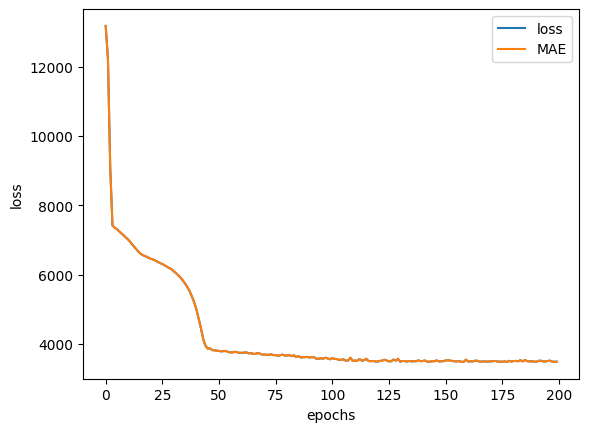

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(insurance_model_4_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_4.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3162.6021 - MAE: 3162.6021


[3162.60205078125, 3162.60205078125]

> 🤔**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EaarlyStopping Callback] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metrics.

## Preprocessing data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

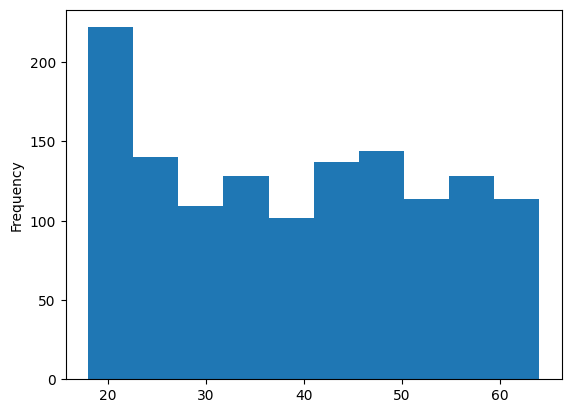

In [ ]:
x["age"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

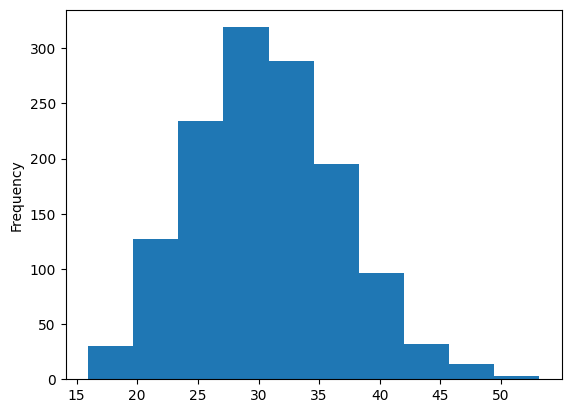

In [ ]:
x["bmi"].plot(kind='hist')

In [ ]:
x['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create x & y
x = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Create train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data  with normalization (MinmaxScaler) and OneHotEncoder,
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
# What does our data look like now?
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and onehot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data

# set random see
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="insurance_model_1")

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["MAE"])

# 3. Fit the model
insurance_model_history = insurance_model.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 6ms/step - loss: 13344.0898 - MAE: 13344.0898
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13336.5469 - MAE: 13336.5469
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13317.5732 - MAE: 13317.5732
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13277.6885 - MAE: 13277.6885
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13206.1240 - MAE: 13206.1240
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 13091.6289 - MAE: 13091.6289
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - loss: 12923.6914 - MAE: 12923.6914
Epoch 8/100
34/34 [==============================] - 0s 11ms/step - loss: 12692.0303 - MAE: 12692.0303
Epoch 9/100
34/34 [==============================] - 1s 18ms/step - loss: 12386.2705 - MAE: 12386.2705
Epoch 10/100
34/34 [==============================] - 1s 18ms/step - loss: 1200

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3440.5205 - MAE: 3440.5205


[3440.5205078125, 3440.5205078125]

Text(0.5, 0, 'epochs')

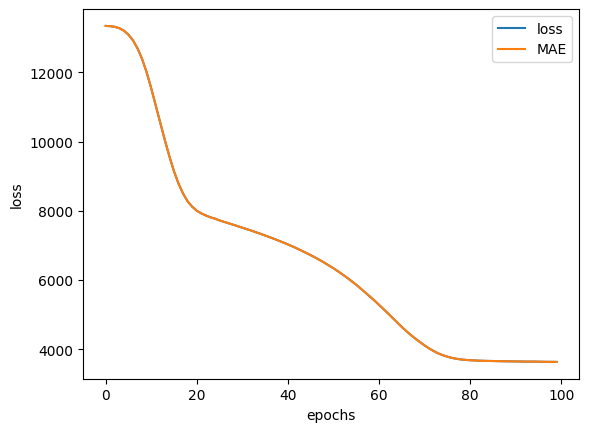

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(insurance_model_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 3162.9912 - MAE: 3162.9912


[3162.9912109375, 3162.9912109375]

In [ ]:
insurance_model.summary()

Model: "insurance_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1200      
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
